<img 
src='https://github.com/LinkedEarth/Logos/raw/master/PYLEOCLIM_logo_HORZ-01.png' width="800">
# Basic timeseries manipulation

## Authors

Jordan Landers1

1 Department of Earth Sciences, University of Southern California

Author1 = {"name": "Jordan Landers", "affiliation": "Department of Earth Sciences, University of Southern
California", "email": "lplander@usc.edu", "orcid": "0000-0001-9772-7617"}

## Preamble

Pyleoclim has multiple functionalities to pre-process a timeseries including standardizing, detrending, and interpolation. You can learn about the various pre-processing steps in Notebooks `.ipynb` and `ipynb`. Here, we simply standardize the data and plot it against the original data:

### Goals:

* Learn to specify a slice of a `Series`
* Learn to quickly view summary statistics of a `Series`
* Learn to standardize a `Series`
* Learn to gaussianize a `Series`


**Reading Time:**

5 minutes

### Keywords
Summary Statistics; Standardize; Gaussianize;

### Pre-requisites

None. This tutorial assumes basic knowledge of Python. If you are not familiar with this coding language, check out [this tutorial](http://linked.earth/ec_workshops_py/).

### Relevant Packages

Pandas, Seaborn

## Data Description

Sea-surface temperature from [Kaplan (1998)](https://psl.noaa.gov/data/gridded/data.kaplan_sst.html) averaged over the NINO3 (5N-5S, 150W-190E)) region.


## Demonstration
### Load a sample dataset

In [1]:
import pyleoclim as pyleo
import pandas as pd
import seaborn as sns

Pyleoclim ships with a few pre-defined datasets:

In [2]:
pyleo.utils.available_dataset_names()

['SOI', 'NINO3', 'HadCRUT5', 'AIR', 'LR04', 'AACO2', 'EDC-dD', 'GISP2']

Let's load the NINO3 timeseries and plot it: 

(<Figure size 1000x400 with 1 Axes>,
 <Axes: xlabel='time [year C.E.]', ylabel='NINO3 [$^{\\circ}$C]'>)

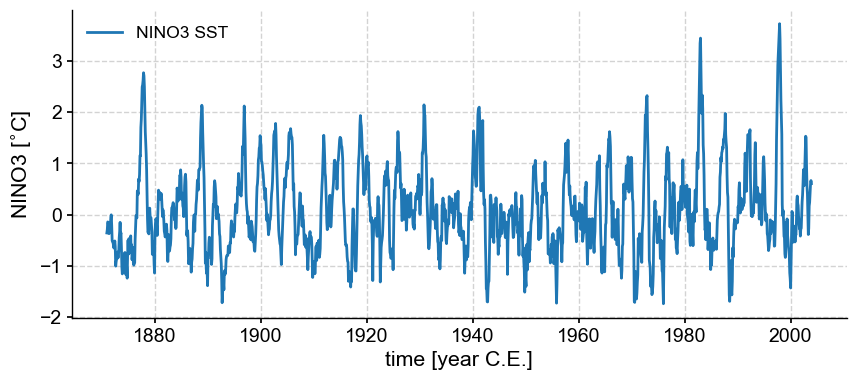

In [3]:
nino3 = pyleo.utils.load_dataset('NINO3')
nino3.plot()

### Slicing
Passing a list containing a pair of dates to `.sel()` will return the time slice of interest. Notice that the syntax involves "slice":

In [4]:
nino_slice = nino3.sel(time=slice(1972, 1998))

<Axes: xlabel='time [year C.E.]', ylabel='NINO3 [$^{\\circ}$C]'>

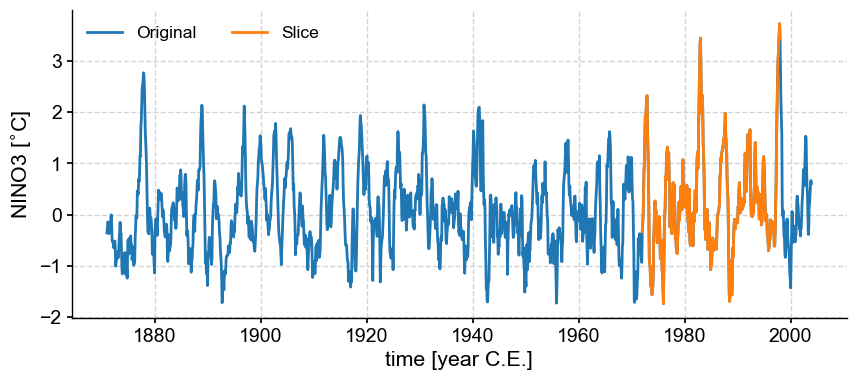

In [5]:
fig, ax = nino3.plot(label='Original')
nino_slice.plot(label='Slice', color='C1', ax=ax, lgd_kwargs={'ncol': 2})

### Stats
Calling `.stats()` will return a handy dictionary of summary statistics (mean, median, min, max, standard deviation, and the interquartile range ([IQR](https://en.wikipedia.org/wiki/Interquartile_range)))

In [6]:
nino3.stats()

{'mean': 0.07816584993045111,
 'median': -0.022333334,
 'min': -1.739667,
 'max': 3.724903,
 'std': 0.8216852391762094,
 'IQR': 1.015916675}

Or you could do it the pandas way:

In [7]:
nino3.to_pandas().describe()

count    1596.000000
mean        0.078166
std         0.821943
min        -1.739667
25%        -0.487979
50%        -0.022333
75%         0.527937
max         3.724903
Name: NINO3, dtype: float64

### Standardizing
Calling `.standardize()` subtracts the mean of the series and divides by the standard deviation.

In [8]:
nino3_std = nino3.standardize()
nino3_std.label = nino3.label + ', standardized' 
nino3_std.stats()

{'mean': 1.3356066461656018e-17,
 'median': -0.12230861543917694,
 'min': -2.212322630686346,
 'max': 4.438119338404606,
 'std': 0.9999999999999998,
 'IQR': 1.2363817999438809}

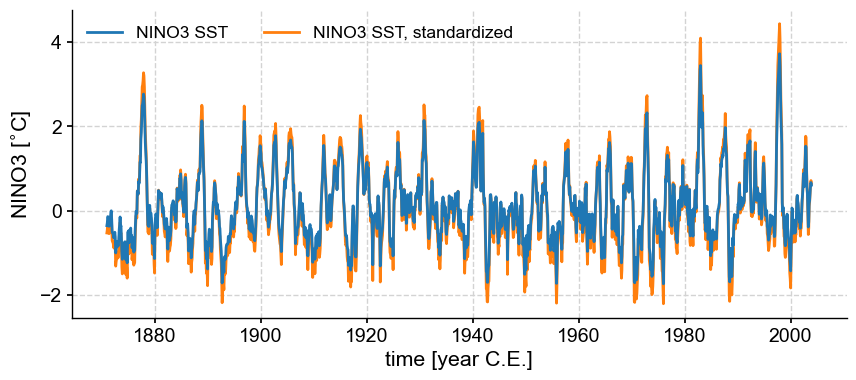

In [9]:
fig, ax = nino3.plot(zorder=99) # this high zorder ensures that it plots on top
ax = nino3_std.plot(ax=ax, lgd_kwargs={'ncol': 2})

### Gaussianize
Calling `.gaussianize()` maps the series to a standard Gaussian distribution. Not only will it have  unit standard deviation ($\sigma=1$), a mean (and median) of 0, but its distribution is now the famed Bell Curve. This may be useful for methods that require data to be normally distributed.

In [10]:
nino3_gaus = nino3.gaussianize()
nino3_gaus.label = nino3.label + ', Gaussianized' 
nino3_gaus.stats()

{'mean': 1.3356066461656018e-17,
 'median': 0.0,
 'min': -3.419845799144218,
 'max': 3.419845799144218,
 'std': 0.9995910124024003,
 'IQR': 1.347994295650057}

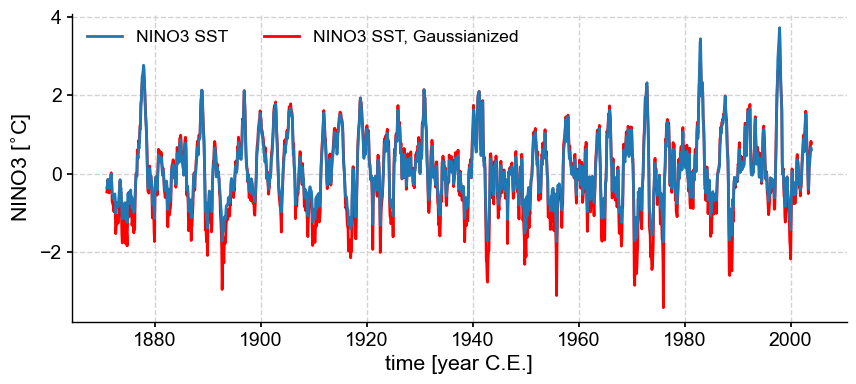

In [11]:
fig, ax = nino3.plot(zorder=99)
ax = nino3_gaus.plot(ax=ax, lgd_kwargs={'ncol': 2}, **{'color':'red'})

Plotting all of them together:

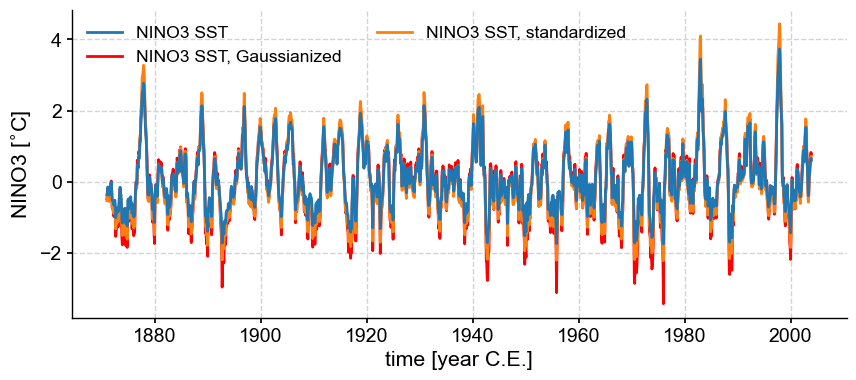

In [12]:
fig, ax = nino3.plot(zorder=99)
ax = nino3_gaus.plot(ax=ax, lgd_kwargs={'ncol': 2}, **{'color':'red'})
ax = nino3_std.plot(ax=ax, lgd_kwargs={'ncol': 2})

### Comparison
For context, it is interesting to compare the different treatments. [Seaborn](https://seaborn.pydata.org/index.html) is a very useful plotting library that works very nicely with [Pandas](https://pandas.pydata.org). To produce this quick comparison, we will gather those 3 Series into a [MultipleSeries object](L0_basic_MSES_manipulation.md) and export it to a [Pandas DataFrame](https://pandas.pydata.org/docs/reference/frame.html). Seaborn will happily ingest this dataframe and return a [kernel density plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) summarizing the probability density of the data values in each treatment. 

In [13]:
nino_ms =  nino3 & nino3_gaus & nino3_std
nino_df = nino_ms.to_pandas()
nino_df

The two series have values differing by more than 1e-05 $^{\circ}$C
Metadata are different:
label property -- left: NINO3 SST, right: NINO3 SST, standardized
The two series have values differing by more than 1e-05 $^{\circ}$C
Metadata are different:
label property -- left: NINO3 SST, Gaussianized, right: NINO3 SST, standardized


NINO3 SST  NINO3 SST, Gaussianized   
datetime                                                  
1870-12-31 03:41:38  -0.358250                -0.468084  \
1871-01-30 14:10:31  -0.292458                -0.377045   
1871-03-02 00:39:56  -0.143583                -0.166461   
1871-04-01 11:08:49  -0.149625                -0.185602   
1871-05-01 21:37:43  -0.274250                -0.348528   
...                        ...                      ...   
2003-08-01 04:22:03   0.238497                 0.361911   
2003-08-31 14:51:28   0.411449                 0.543054   
2003-10-01 01:20:21   0.592756                 0.752493   
2003-10-31 11:49:14   0.664131                 0.825394   
2003-11-30 22:18:39   0.604324                 0.771389   

                     NINO3 SST, standardized  
datetime                                      
1870-12-31 03:41:38                -0.531123  
1871-01-30 14:10:31                -0.451054  
1871-03-02 00:39:56                -0.269871  
1871-04-01 11:08:49                -0.277224  
1871-05-01 21:37:43                -0.428894  
...                                      ...  
2003-08-01 04:22:03                 0.195125  
2003-08-31 14:51:28                 0.405609  
2003-10-01 01:20:21                 0.626262  
2003-10-31 11:49:14                 0.713126  
2003-11-30 22:18:39                 0.640341  

[1596 rows x 3 columns]

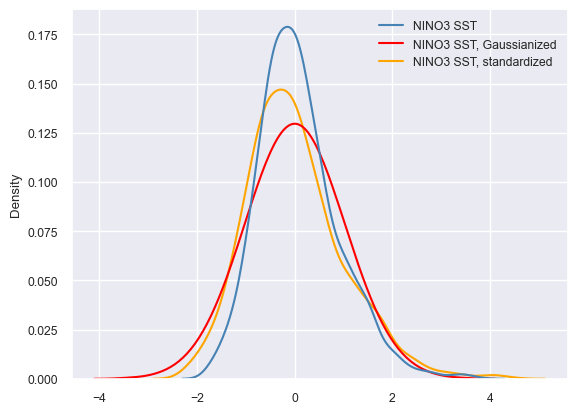

In [14]:
sns.set(font_scale=0.8)
ax = sns.kdeplot(data=nino_df, palette={'NINO3 SST':'steelblue', 'NINO3 SST, Gaussianized':'red', 'NINO3 SST, standardized':'orange'})
ax.legend_.set_title(None)